In [159]:
import os
import pandas as pd

In [160]:
def get_game_codes():

    directory = './demo_data/'

    files = os.listdir(directory)

    game_codes = []

    for file in files:
        game_code = file.split('_')[0]
        game_codes.append(game_code)

    game_codes = list(set(game_codes))

    return game_codes

In [161]:
def get_data(game_code, event_type):

    directory = './demo_data/'

    filename = f'{directory}{game_code}_{event_type}.txt'

    df = pd.read_csv(filename, sep='\t')

    return df

In [162]:
def save_df_translated(game_code, event_type, df):

    directory = './data_translated/'

    filename = f'{directory}{game_code}_{event_type}.csv'

    df.to_csv(filename)

In [163]:
def translate_meta(game_code, event_type):

    df = get_data(game_code, event_type)

    # English translations
    english_translations = {
    'codigo': 'code',
    'tipo': 'type',
    'equipo': 'team',
    'player': 'player',
    'x': 'x',
    'y': 'y',
    'min': 'minute',
    'sec': 'second',
    'period': 'period',
    'partido': 'match',
    'nombre_equipo': 'team_name',
    'nombre_jugador': 'player_name',
    'outcome': 'outcome',
    'fase': 'phase',
    'end_x': 'end_x',
    'end_y': 'end_y',
    'extra': 'extra'
    }

    # Renaming the columns based on the English translations
    df.rename(columns=english_translations, inplace=True)

    return df

In [164]:
event_code_meanings = {
    1: "pass",
    2: "offside_pass",
    3: "take_on",
    4: "foul",
    5: "out",
    6: "corner",
    7: "tackle",
    8: "interception",
    9: "turnover",
    10: "save",
    11: "claim",
    12: "clearance",
    13: "miss",
    14: "post",
    15: "attempt_saved",
    16: "goal",
    17: "card",
    18: "player_off",
    19: "player_on",
    20: "player_retired",
    21: "player_returns",
    22: "player_becomes_goalkeeper",
    23: "goalkeeper_becomes_player",
    24: "condition_change",
    25: "official_change",
    27: "start_delay",
    28: "end_delay",
    30: "end",
    32: "start",
    34: "team_setup",
    35: "player_changed_position",
    36: "player_changed_jersey_number",
    37: "collection_end",
    38: "temporary_goal",
    39: "temporary_attempt",
    40: "formation_change",
    41: "punch",
    42: "good_skill",
    43: "deleted_event",
    44: "aerial_duel",
    45: "challenge",
    47: "rescinded_card",
    49: "ball_recovery",
    50: "dispossessed",
    51: "error",
    52: "keeper_pick-up",
    53: "cross_not_claimed",
    54: "smother",
    55: "offside_provoked",
    56: "shield_ball_opponent",
    57: "foul_throw-in",
    58: "penalty_faced",
    59: "keeper_sweeper",
    60: "chance_missed",
    61: "ball_touch",
    63: "temporary_save",
    64: "resume",
    65: "contentious_referee_decision",
    66: "possession_data",
    67: "50/50",
    68: "referee_drop_ball",
    69: "failed_to_block",
    70: "injury_time_announcement",
    71: "coach_setup",
    72: "caught_offside",
    73: "other_ball_contact",
    74: "blocked_pass",
    75: "delayed_start",
    76: "early_end",
    77: "player_off_pitch"
}


In [165]:
def translate_types(game_code, event_type, df):


    df['type'] = df.apply(lambda row: translate_type(row), axis=1)

    return df

In [189]:
def translate_files(game_code, event_type='all_events'):

    df = translate_meta(game_code, event_type)

    if event_type in ['all_events','key_event']:
        df = translate_types(game_code, event_type, df)

    save_df_translated(game_code, event_type, df)

In [170]:
def get_data_translated(game_code, event_type='all_events'):

    get_data(game_code, event_type)

    translate_files(game_code, event_type)
    
    directory = './data_translated/'

    filename = f'{directory}{game_code}_{event_type}.csv'

    df = pd.read_csv(filename)

    return df

In [190]:
game_codes = get_game_codes()

events = get_data_translated(game_codes[0], event_type='key_event')

In [191]:
events.type.unique()

array(['0ball_out', '0aerial_duel_lost', '0blocked_pass', '0mal_control',
       'miss', '0despeje_clearance', '0interception', '0dispossessed',
       'goal', 'attempt_saved', 'player_off', 'player_in',
       '0me_cortan_balon_cuerpo'], dtype=object)

In [17]:
from config import PitchMeta
import numpy as np
import itertools

pitch_graph = {i: [0, 0, np.zeros(shape=[PitchMeta.x * PitchMeta.y])] for i in range(PitchMeta.x * PitchMeta.y)}
pitch_graph[2][2][0]


0.0

In [119]:
from data_type import PlayerCoordinate

def get_the_closest_tile(player_coordinate: PlayerCoordinate):
    # the pitch size is 100 * 100, and converted to 16 * 12
    tile_x = round(player_coordinate.x / (100 / PitchMeta.x))
    tile_y = round(player_coordinate.y / (100 / PitchMeta.y))
    if tile_x == 16:
        tile_x = 15
    if tile_y == 12:
        tile_y = 11

    if tile_y == 0:
        tile_id = tile_x
    else:
        tile_id =  tile_y * PitchMeta.x + tile_x
    
    return tile_x, tile_y, tile_id
    #return tile_id

In [120]:
# Test the four corners of the pitch
corners = [
    PlayerCoordinate(0, 0),
    PlayerCoordinate(100, 0),
    PlayerCoordinate(0, 100),
    PlayerCoordinate(100, 100),
    PlayerCoordinate(50, 50)
]

for corner in corners:
    tile_x, tile_y, tile_id = get_the_closest_tile(corner)
    print(f"Player Coordinate: ({corner.x}, {corner.y})")
    print(f"Tile Coordinates: ({tile_x}, {tile_y})")
    print(f"Tile ID: {tile_id}")
    print("------")

Player Coordinate: (0, 0)
Tile Coordinates: (0, 0)
Tile ID: 0
------
Player Coordinate: (100, 0)
Tile Coordinates: (15, 0)
Tile ID: 15
------
Player Coordinate: (0, 100)
Tile Coordinates: (0, 11)
Tile ID: 176
------
Player Coordinate: (100, 100)
Tile Coordinates: (15, 11)
Tile ID: 191
------
Player Coordinate: (50, 50)
Tile Coordinates: (8, 6)
Tile ID: 104
------


In [21]:
def shot_map(events):

    # Find shots for each team
    from mplsoccer import Pitch

    # create shots dataframe for given team
    shots = events[events['codigo'].isin([13, 14 ,15, 16])]
 
    # create dataframe of goals
    goals = shots[shots['codigo'] == 16]

    # plot pitch
    pitch = Pitch(pitch_type='opta')

    fig, ax = pitch.draw(figsize=[10,8])

    # plot shots
    sc = pitch.scatter(shots['x'], shots['y'],
                       c='grey',
                       edgecolors='#383838',
                       ax=ax)

    # plot goals
    sc = pitch.scatter(goals['x'], goals['y'],
                       c= 'red',
                       edgecolors='#383838',
                       ax=ax)

    return fig, ax

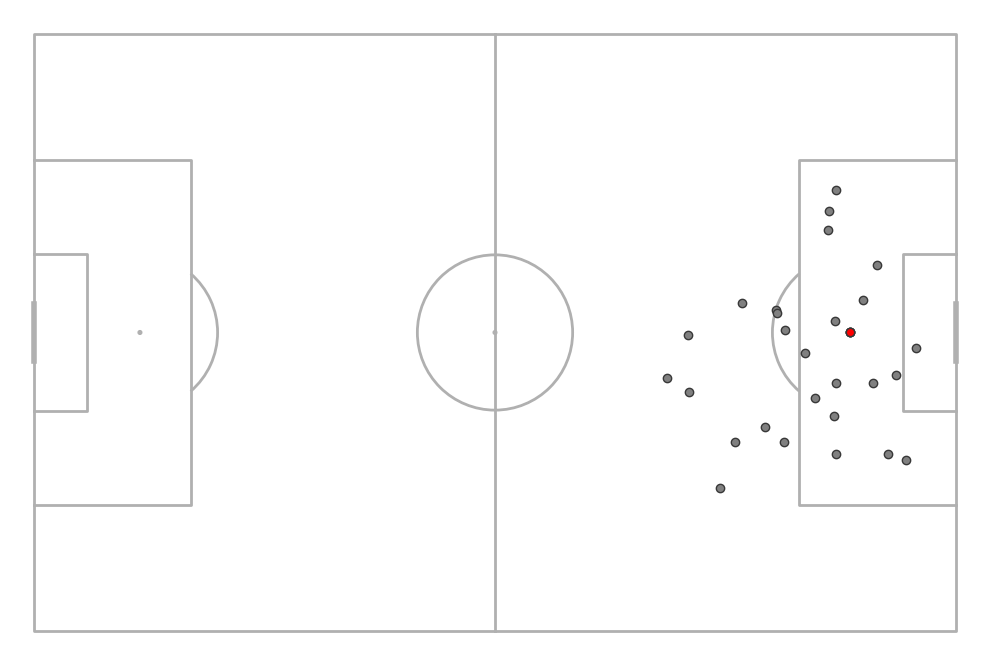

In [22]:
import pandas as pd
events = pd.read_csv('./demo_data/2372222_all_events.txt', sep='\t')

fig, ax = shot_map(events)

In [23]:
import random

my_dict = {
    'key1': random.randint(1, 100),
    'key2': random.uniform(0.0, 1.0),
    'key3': random.choice(['apple', 'banana', 'orange']),
    'key4': random.random()
}

print(len(my_dict))


4
